In [1]:
# 
# Copyright (c) 2022 Go2Market Insights d/b/a Analyzr
# All rights reserved
# https://analyzr.ai
# 
# The above copyright notice and this permission notice shall be included in all copies or substantial portions
# of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO
# THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT,
# TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
# 
# For access to the original model go to https://app.analyzr.ai
# For support and documentation see comments below or go to https://support.analyzr.ai
# 
# To run this notebook you will need the following Python packages:
#   - pandas
#   - numpy
#   - sklearn
#   - analyzrclient
#   - matplotlib
#   - seaborn
#
# This notebook was automatically generated by Analyzr.
#
import pandas as pd
import numpy as np
import sys, os, uuid
from copy import deepcopy
import datetime 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [2]:
# 
# LOAD DATA
# 
# This notebook assumes your original source file is in the same folder as this Jupyter
# notebook. You may need to update the path below. 
# 
raw_data = pd.read_csv('https://g2mstaticfiles.blob.core.windows.net/$web/titanic.csv', encoding = "ISO-8859-1", low_memory=False)
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 
# TAKE A SUBSET OF THE ORIGINAL DATASET
# 
# This step selects a subset of the original dataset for training purposes. 
# It also assigns a record identifier field (ID_FIELD) for audit and reconciliation 
# purposes. 
# 
SELECTED_FIELDS = [
    'Survived',
    'Pclass',
    'Sex',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'PassengerId',
    'Age',
]
ID_FIELD = 'PassengerId'
df = raw_data[SELECTED_FIELDS].dropna()
df[ID_FIELD] = df[ID_FIELD].astype('string')
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,PassengerId,Age
0,0,3,male,1,0,7.2500,S,1,22.0
1,1,1,female,1,0,71.2833,C,2,38.0
2,1,3,female,0,0,7.9250,S,3,26.0
3,1,1,female,1,0,53.1000,S,4,35.0
4,0,3,male,0,0,8.0500,S,5,35.0


In [4]:
# 
# ASSIGN VARIABLE TYPES
# 
# This step assigns variable types. OUTCOME_VAR identifies the dependent variable.
# Other arrays identify independent variables by type: categorical, numerical, or boolean. 
# 
OUTCOME_VAR = 'Age' 
CATEGORICAL_VARS = ['Sex', 'Embarked'] 
NUMERICAL_VARS = ['Pclass', 'SibSp', 'Parch', 'Fare'] 
BOOLEAN_VARS = ['Survived'] 

In [5]:
# 
# START ANALYZR CLIENT
# 
# Access to the Analyzr API requires credentials. Contact your account manager or contact 
# our support team at https://support.analyzr.ai for more info. If you are a free tier user 
# you can skip this step altogether and use your local compute resources. 
# 
# For installation instructions on the Analyzr client see https://github.com/analyzr-ai/analyzr-sdk-python
# 
from analyzrclient import Analyzer
analyzer = Analyzer(host='analyzr4.api.g2m.ai')
analyzer.login()
analyzer.version()

Login successful


{'status': 200,
 'response': {'version': 'v1.5.3.214',
  'tenant': 'Analyzr4',
  'copyright': '2022 (c) Go2Market Insights LLC. All rights reserved.'}}

In [6]:
#
# TRAIN MODEL
#
# This step performs model training and cross-validation. If you do not have API access, e.g. free 
# tier users, you will need to replace the training command with your own model.fit() statement 
# for model training and cross-validation using local compute resources.  
# 
# Note also this version keeps polling the API while the model is training. For longer training runs 
# you may want to disable polling and manually check the status of your model (see next cell). 
# 
t_0 = datetime.datetime.now()
client_id = 'null'
algorithm = 'xgboost-regression'
verbose = True
res = analyzer.regression.train(
    df, client_id=client_id, 
    idx_var=ID_FIELD, outcome_var=OUTCOME_VAR, categorical_vars=CATEGORICAL_VARS, numerical_vars=NUMERICAL_VARS, 
    algorithm=algorithm, train_size=0.7, 
    buffer_batch_size=1000, verbose=verbose, poll=True, compressed=True, 
)
print('model_id: {}'.format(res['model_id']))
print('total time: {}'.format(datetime.datetime.now()-t_0))

Model ID: e506e4d6-046a-477d-a4a1-d345723dc3b7
Encoding categorical variables:
	Sex
	Embarked
Encoding numerical variables:
	Pclass
	SibSp
	Parch
	Fare
Encoding record IDs...
Encoding field names...
Saving encoding keys locally...
Saving data to buffer...
        Processed batch 1 of 1
Training regression model using data in buffer...
Training request posted.
[_poll][38] {'status': 200, 'response': {'request_id': 'e506e4d6-046a-477d-a4a1-d345723dc3b7', 'status': 'Complete', 'details': 'Post-processing results in analytics engine...'}}
Retrieving training results...
    Retrieving features...
    Retrieving performance stats...
Clearing buffer...
model_id: e506e4d6-046a-477d-a4a1-d345723dc3b7
total time: 0:00:56.314505


In [7]:
#
# CHECK STATUS OF MODEL RUN
# 
# For manual polling uncomment the lines below. 
# 
# res = analyzer.regression.check_status(model_id=res['model_id'], client_id=client_id, verbose=True) 
# res 

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

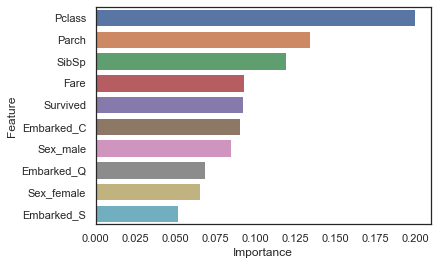

In [8]:
#
# DISPLAY FEATURE IMPORTANCE 
#
sns.barplot(data=res['features'][0:15], x='Importance', y='Feature')

In [9]:
#
# SHOW FEATURE IMPORTANCE TABLE
#
res['features']

,Feature,Importance
0,Pclass,0.199814
1,Parch,0.134224
2,SibSp,0.119284
3,Fare,0.092894
4,Survived,0.092537
5,Embarked_C,0.090332
6,Sex_male,0.084832
7,Embarked_Q,0.068638
8,Sex_female,0.065651
9,Embarked_S,0.051793


In [10]:
#
# SHOW ERROR STATISTICS
#
res['stats']

,Parameter,Value
0,R2,2.771195e-01
1,p,1.182596e-16
2,RMSE,1.184248e+01
3,MSE,1.402444e+02
4,MAE,9.250950e+00
5,MAPE,8.080706e-01
